# HOMEWORK 14

In this homework you are going to build your first classifier for the CIFAR-10 dataset. This dataset contains 10 different classes and you can learn more about it [here](https://www.cs.toronto.edu/~kriz/cifar.html). This homework consists of the following tasks:
* Dataset inspection
* Building the network
* Training
* Evaluation

At the end, as usual, there will be a couple of questions for you to answer :-)

In [7]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.layers import Conv2D, Dense, Flatten, Input, MaxPooling2D
from tensorflow.keras import Model
from time import time

from matplotlib import pyplot as plt
plt.rcParams['figure.figsize'] = [15, 10]

# Set the seeds for reproducibility
from numpy.random import seed
from tensorflow.random import set_seed
seed_value = 1234578790
seed(seed_value)
set_seed(seed_value)

### Step 0: Dataset Inspection

Load the dataset and make a quick inspection.

<ipython-input-8-a1aa36235a9c>:18: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  plt.title(classes[int(y_train[idx])])


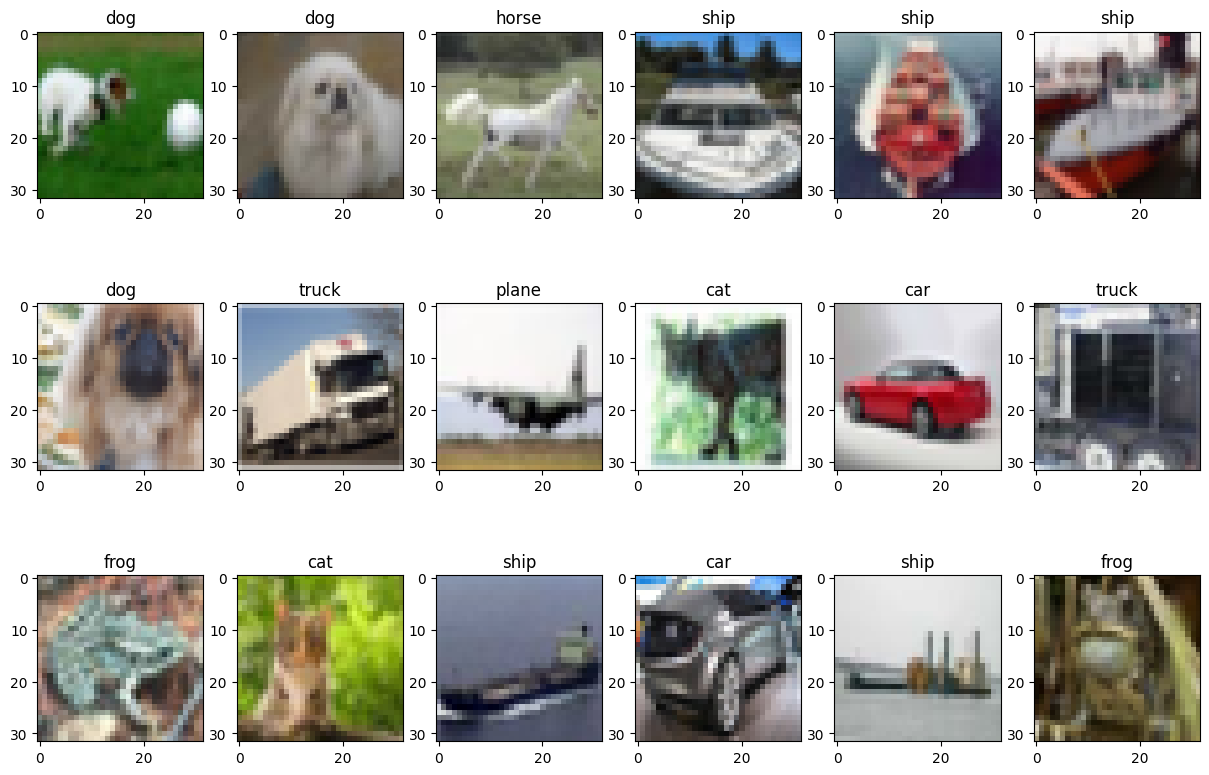

In [8]:
# Load the dataset
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.cifar10.load_data()
# Mapping from class ID to class name
classes = {0:'plane', 1:'car', 2:'bird', 3:'cat', 4:'deer',
           5:'dog', 6:'frog', 7:'horse', 8:'ship', 9:'truck'}

# Dataset params
num_classes = len(classes)
size = x_train.shape[1]

# Visualize random samples (as a plot with 3x6 samples)
for ii in range(18):
    plt.subplot(3,6,ii+1)
    # Pick a random sample
    idx = np.random.randint(x_train.shape[0])
    # Show the image and the label
    plt.imshow(x_train[idx, ...])
    plt.title(classes[int(y_train[idx])])

Compute the class histogram (you can visualize it if you want). Is the dataset balanced?

Hint: You might find [Counter](https://docs.python.org/3/library/collections.html#collections.Counter) tool useful. In any case, it's up to you how you compute the histogram.

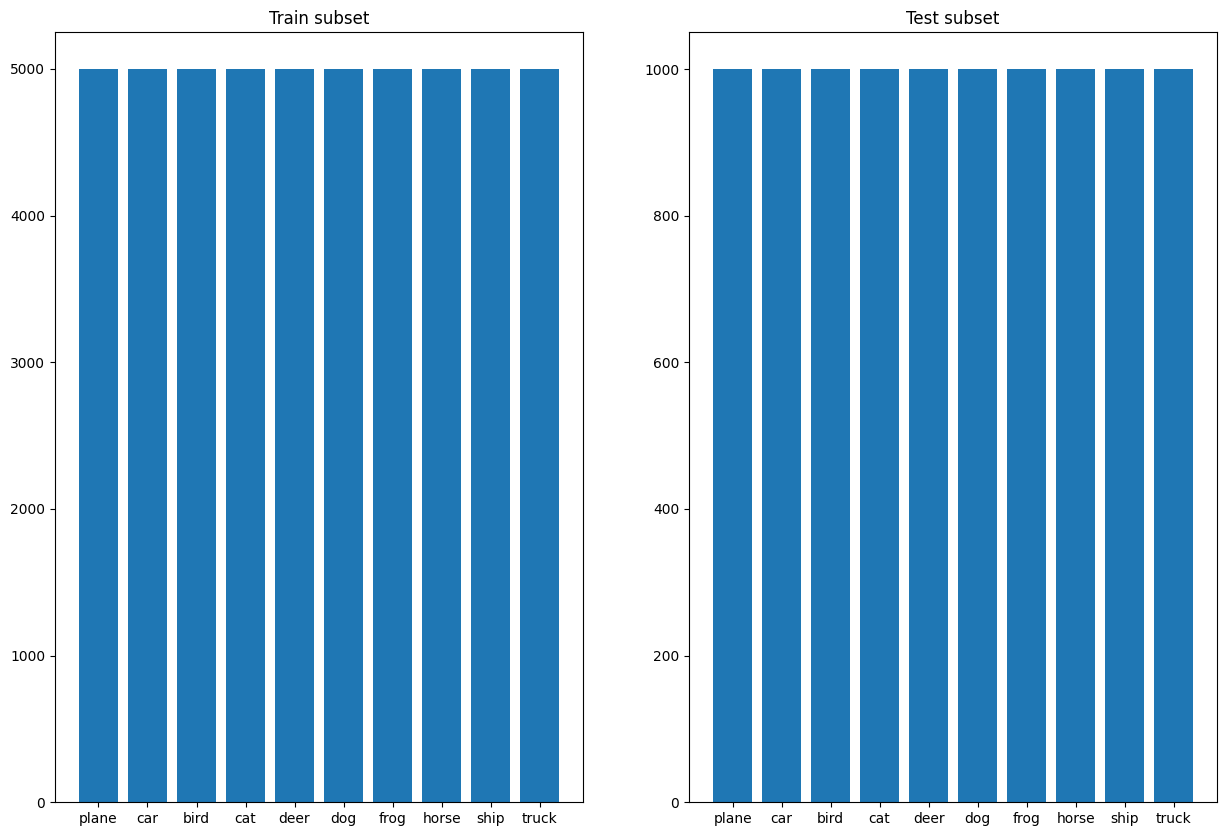

In [9]:
# Compute the class histogram
hist, bins = np.histogram(y_train, bins=num_classes)
plt.subplot(121)
plt.bar(range(num_classes), hist)
plt.xticks(range(num_classes), [classes[i] for i in range(num_classes)])
plt.title('Train subset')
plt.subplot(122)
hist, bins = np.histogram(y_test, bins=num_classes)
plt.bar(range(num_classes), hist)
plt.xticks(range(num_classes), [classes[i] for i in range(num_classes)])
plt.title('Test subset');

**Yes, the dataset is perfectly balanced in terms of classes.**

### Step 1: Data Preparation

In this step, you'll need to prepare the data for training, i.e., you will have to normalize it and encode the labels as one-hot vectors.

In [10]:
# Normalization
x_train = x_train.astype('float32') / 255
x_test = x_test.astype('float32') / 255

# One-hot encoding
y_train = tf.keras.utils.to_categorical(y_train, num_classes)
y_test = tf.keras.utils.to_categorical(y_test, num_classes)

print('Train set:   ', len(y_train), 'samples')
print('Test set:    ', len(y_test), 'samples')
print('Sample dims: ', x_train.shape)

Train set:    50000 samples
Test set:     10000 samples
Sample dims:  (50000, 32, 32, 3)


### Step 2: Building the Classifier

Build the CNN for CIFAR10 classification. For starters, you can use the same network we used in the lesson for the MNIST problem.

In [11]:
# Build the classifier
inputs = Input(shape=(size, size, 3))
net = Conv2D(16, kernel_size=(3, 3), activation="relu")(inputs)
net = MaxPooling2D(pool_size=(2, 2))(net)
net = Conv2D(32, kernel_size=(3, 3), activation="relu")(net)
net = MaxPooling2D(pool_size=(2, 2))(net)
net = Flatten()(net)
outputs = Dense(num_classes, activation="softmax")(net)

model = Model(inputs, outputs)

# Show the model
model.summary()

Model: "model_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 32, 32, 3)]       0         
                                                                 
 conv2d_2 (Conv2D)           (None, 30, 30, 16)        448       
                                                                 
 max_pooling2d_2 (MaxPoolin  (None, 15, 15, 16)        0         
 g2D)                                                            
                                                                 
 conv2d_3 (Conv2D)           (None, 13, 13, 32)        4640      
                                                                 
 max_pooling2d_3 (MaxPoolin  (None, 6, 6, 32)          0         
 g2D)                                                            
                                                                 
 flatten_1 (Flatten)         (None, 1152)              0   

### Step 3: Training

Compile the model and train it.

In [12]:
epochs = 25
batch_size = 128

# Compile the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Train the model
history = model.fit(x_train, y_train, epochs=epochs, batch_size=batch_size, validation_data=(x_test, y_test))

Epoch 1/25
391/391 [==============================] - 34s 84ms/step - loss: 1.7138 - accuracy: 0.3849 - val_loss: 1.4788 - val_accuracy: 0.4666
Epoch 2/25
391/391 [==============================] - 31s 80ms/step - loss: 1.3828 - accuracy: 0.5134 - val_loss: 1.3446 - val_accuracy: 0.5299
Epoch 3/25
391/391 [==============================] - 33s 84ms/step - loss: 1.2893 - accuracy: 0.5512 - val_loss: 1.2642 - val_accuracy: 0.5545
Epoch 4/25
391/391 [==============================] - 30s 77ms/step - loss: 1.2225 - accuracy: 0.5769 - val_loss: 1.2396 - val_accuracy: 0.5578
Epoch 5/25
391/391 [==============================] - 34s 86ms/step - loss: 1.1738 - accuracy: 0.5929 - val_loss: 1.1837 - val_accuracy: 0.5861
Epoch 6/25
391/391 [==============================] - 31s 79ms/step - loss: 1.1406 - accuracy: 0.6046 - val_loss: 1.1323 - val_accuracy: 0.6066
Epoch 7/25
391/391 [==============================] - 32s 82ms/step - loss: 1.1071 - accuracy: 0.6171 - val_loss: 1.1276 - val_accuracy:

Train Acc      0.7004200220108032
Validation Acc 0.6712999939918518


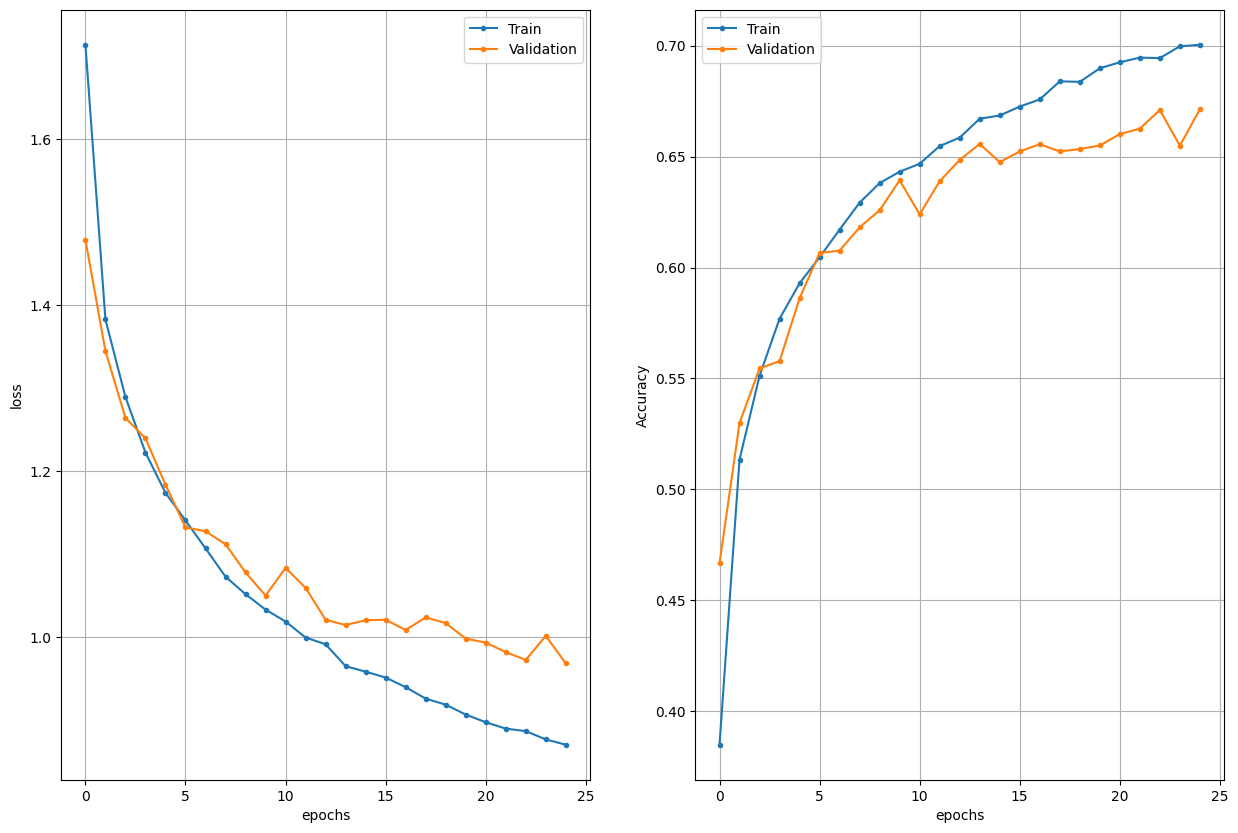

In [13]:
# Show training history (this cell is complete, nothing to implement here :-) )
h = history.history
epochs = range(len(h['loss']))

plt.subplot(121), plt.plot(epochs, h['loss'], '.-', epochs, h['val_loss'], '.-')
plt.grid(True), plt.xlabel('epochs'), plt.ylabel('loss')
plt.legend(['Train', 'Validation'])
plt.subplot(122), plt.plot(epochs, h['accuracy'], '.-',
                           epochs, h['val_accuracy'], '.-')
plt.grid(True), plt.xlabel('epochs'), plt.ylabel('Accuracy')
plt.legend(['Train', 'Validation'])

print('Train Acc     ', h['accuracy'][-1])
print('Validation Acc', h['val_accuracy'][-1])

### Step 4: Evaluation

In this step, you have to calculate the accuracies and visualize some random samples. For the evaluation, you are going to use the test split from the dataset.

In [14]:
# Compute the labels and the predictions as sparse values
y_true = np.argmax(y_test, axis=1)
y_pred = np.argmax(model.predict(x_test), axis=1)

313/313 [==============================] - 3s 8ms/step


In [15]:
# Compute and print the accuracy for each class
for class_id, class_name in classes.items():

    acc = np.sum(y_pred[y_true == class_id] == class_id) / np.sum(y_true == class_id)
    print(class_name, acc)

plane 0.704
car 0.796
bird 0.511
cat 0.414
deer 0.702
dog 0.601
frog 0.785
horse 0.664
ship 0.77
truck 0.766


In [16]:
# Print the overall stats
ev = model.evaluate(x_test, y_test)
print('Test loss  ', ev[0])
print('Test metric', ev[1])

313/313 [==============================] - 2s 8ms/step - loss: 0.9684 - accuracy: 0.6713
Test loss   0.9683731198310852
Test metric 0.6712999939918518


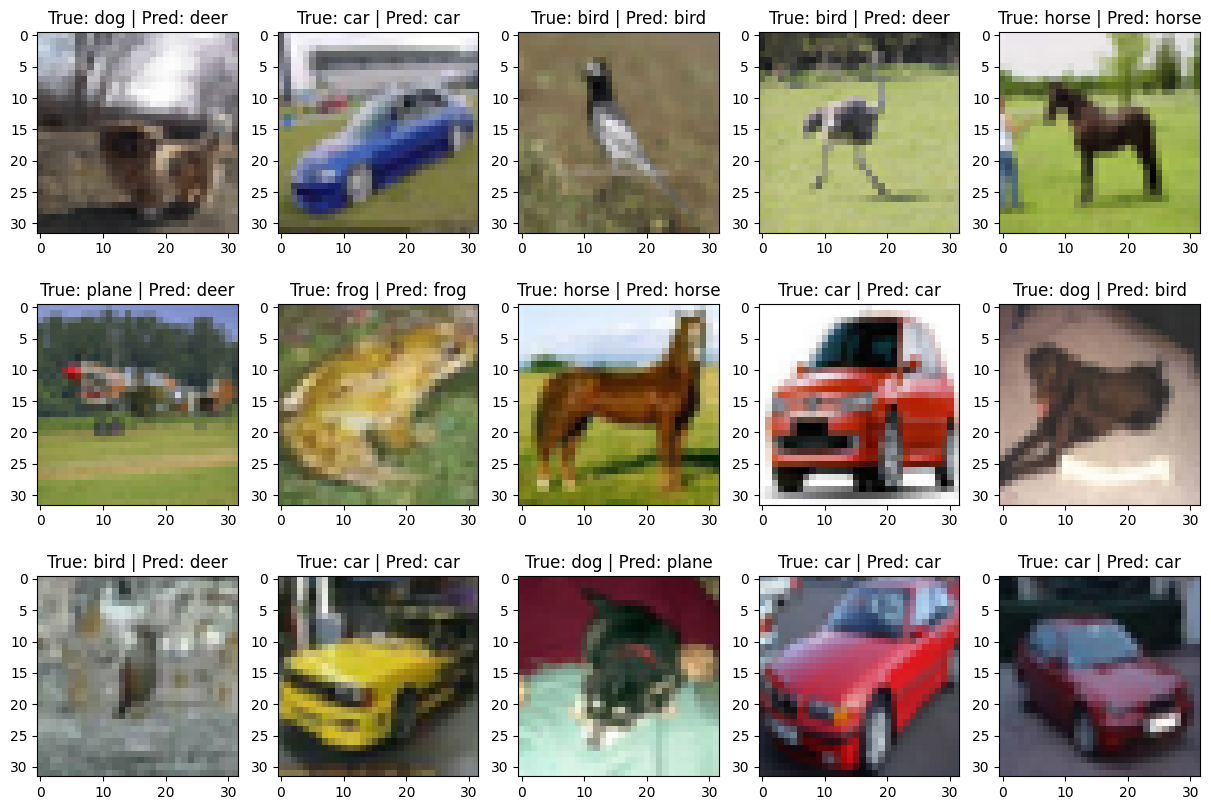

In [17]:
# Show random samples
for ii in range(15):
    # Pick a random sample
    idx = np.random.randint(x_test.shape[0])
    # Show the results
    plt.subplot(3,5,ii+1), plt.imshow(x_test[idx, ...])
    plt.title('True: ' + str(classes[y_true[idx]]) + ' | Pred: ' + str(classes[y_pred[idx]]))

### Questions
* What is the overall accuracy of the classifier?
* What modifications would you do in order to improve the classification accuracy?
* Make **one** modification (that you think can help) and train the classifier again. Does the accuracy improve?

### Answers

- The overall accuracy is 67.12% with the best class as car (79%) and worst class as cat (41%)
- In order to improve the accuracy I would use bigger model and train it longer, since at this point the bias is big and the variance is relatively small.
- BUT, I discovered, that even smaller change - using lower batch size - gives much better accuracy: 68.95%. I think that is because smaller batch size allows more stochasticity in gradient descent and thus it dodges local minimas better.

In [24]:
# Build the classifier
inputs = Input(shape=(size, size, 3))
net = Conv2D(16, kernel_size=(3, 3), activation="relu")(inputs)
net = MaxPooling2D(pool_size=(2, 2))(net)
net = Conv2D(32, kernel_size=(3, 3), activation="relu")(net)
net = MaxPooling2D(pool_size=(2, 2))(net)
net = Flatten()(net)
outputs = Dense(num_classes, activation="softmax")(net)

model = Model(inputs, outputs)

# Show the model
model.summary()

Model: "model_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_6 (InputLayer)        [(None, 32, 32, 3)]       0         
                                                                 
 conv2d_10 (Conv2D)          (None, 30, 30, 16)        448       
                                                                 
 max_pooling2d_10 (MaxPooli  (None, 15, 15, 16)        0         
 ng2D)                                                           
                                                                 
 conv2d_11 (Conv2D)          (None, 13, 13, 32)        4640      
                                                                 
 max_pooling2d_11 (MaxPooli  (None, 6, 6, 32)          0         
 ng2D)                                                           
                                                                 
 flatten_5 (Flatten)         (None, 1152)              0   

In [25]:
epochs = 25
batch_size = 32

# Compile the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Train the model
history = model.fit(x_train, y_train, epochs=epochs, batch_size=batch_size, validation_data=(x_test, y_test))

Epoch 1/25
1563/1563 [==============================] - 39s 25ms/step - loss: 1.5561 - accuracy: 0.4442 - val_loss: 1.3348 - val_accuracy: 0.5242
Epoch 2/25
1563/1563 [==============================] - 42s 27ms/step - loss: 1.2660 - accuracy: 0.5565 - val_loss: 1.2334 - val_accuracy: 0.5644
Epoch 3/25
1563/1563 [==============================] - 49s 31ms/step - loss: 1.1500 - accuracy: 0.6015 - val_loss: 1.1218 - val_accuracy: 0.6128
Epoch 4/25
1563/1563 [==============================] - 47s 30ms/step - loss: 1.0704 - accuracy: 0.6285 - val_loss: 1.0664 - val_accuracy: 0.6325
Epoch 5/25
1563/1563 [==============================] - 41s 26ms/step - loss: 1.0172 - accuracy: 0.6504 - val_loss: 1.0610 - val_accuracy: 0.6346
Epoch 6/25
1563/1563 [==============================] - 42s 27ms/step - loss: 0.9767 - accuracy: 0.6668 - val_loss: 1.0535 - val_accuracy: 0.6380
Epoch 7/25
1563/1563 [==============================] - 37s 24ms/step - loss: 0.9450 - accuracy: 0.6756 - val_loss: 1.0107 -

Train Acc      0.7429400086402893
Validation Acc 0.6894999742507935


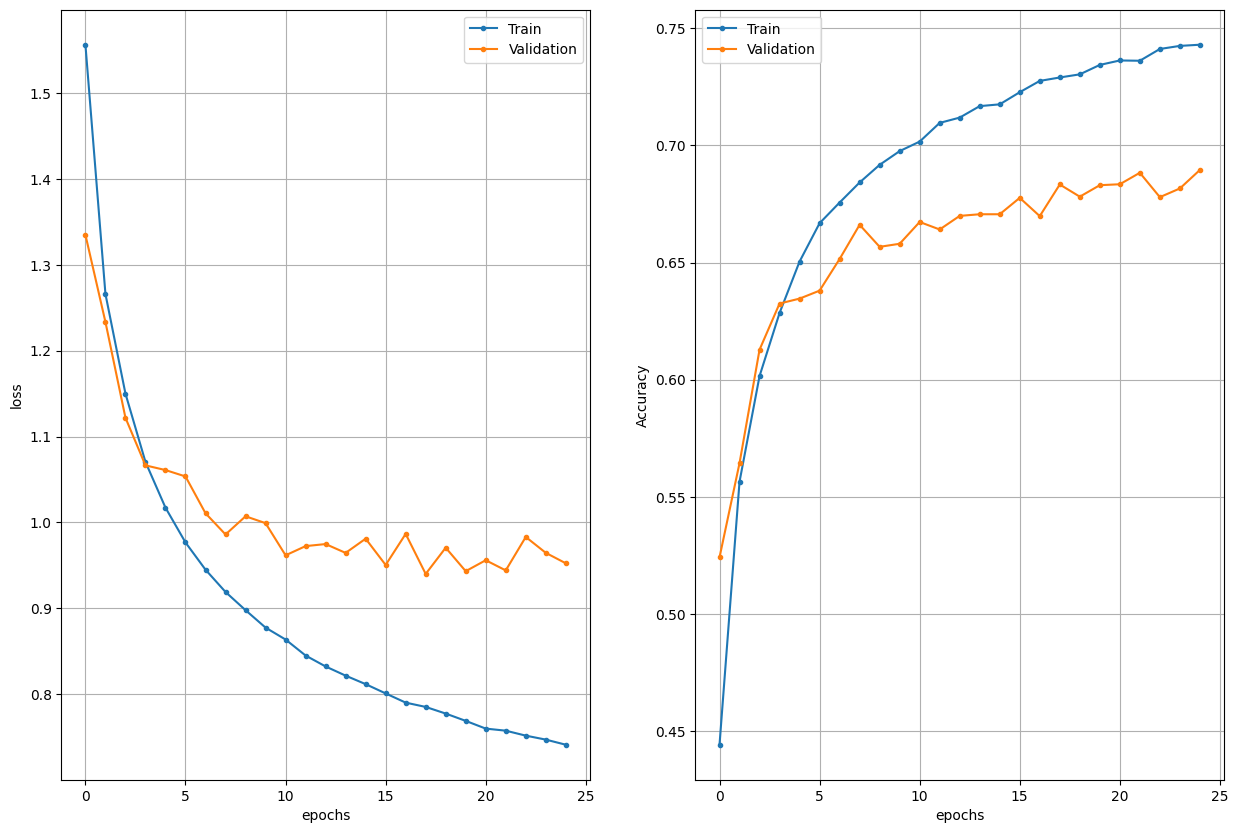

In [26]:
# Show training history (this cell is complete, nothing to implement here :-) )
h = history.history
epochs = range(len(h['loss']))

plt.subplot(121), plt.plot(epochs, h['loss'], '.-', epochs, h['val_loss'], '.-')
plt.grid(True), plt.xlabel('epochs'), plt.ylabel('loss')
plt.legend(['Train', 'Validation'])
plt.subplot(122), plt.plot(epochs, h['accuracy'], '.-',
                           epochs, h['val_accuracy'], '.-')
plt.grid(True), plt.xlabel('epochs'), plt.ylabel('Accuracy')
plt.legend(['Train', 'Validation'])

print('Train Acc     ', h['accuracy'][-1])
print('Validation Acc', h['val_accuracy'][-1])

In [27]:
# Compute the labels and the predictions as sparse values
y_true = np.argmax(y_test, axis=1)
y_pred = np.argmax(model.predict(x_test), axis=1)

313/313 [==============================] - 3s 10ms/step


In [28]:
# Compute and print the accuracy for each class
for class_id, class_name in classes.items():

    acc = np.sum(y_pred[y_true == class_id] == class_id) / np.sum(y_true == class_id)
    print(class_name, acc)

plane 0.745
car 0.859
bird 0.525
cat 0.532
deer 0.626
dog 0.644
frog 0.777
horse 0.683
ship 0.774
truck 0.73


In [29]:
# Print the overall stats
ev = model.evaluate(x_test, y_test)
print('Test loss  ', ev[0])
print('Test metric', ev[1])

313/313 [==============================] - 4s 13ms/step - loss: 0.9524 - accuracy: 0.6895
Test loss   0.952414333820343
Test metric 0.6894999742507935
